In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"..\Data\SAdata\2012_A.csv")

In [44]:
df.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid
0,BTW001,12005762,2012-10-01 00:00:00,1.200000,1.0
1,BTW001,12005762,2012-10-01 01:00:00,1.300000,1.0
2,BTW001,12005762,2012-10-01 02:00:00,1.216667,1.0
3,BTW001,12005762,2012-10-01 03:00:00,1.233333,1.0
4,BTW001,12005762,2012-10-01 04:00:00,1.316667,1.0


In [3]:
#Lengths of Profile ID groups
groups1 = df.groupby("ProfileID")['Unitsread'].apply(lambda x: len(x))
groups1 = groups1.sort_values(ascending = False)
print(groups1.head())
len(groups1)

ProfileID
12006364    8769
12006416    8769
12006299    8769
12006303    8769
12006433    8769
Name: Unitsread, dtype: int64


1587

We can see that the right ID is the profile ID. There is however not exactly 8760 values, lets plot the number of values for each ID to get more insight

1587


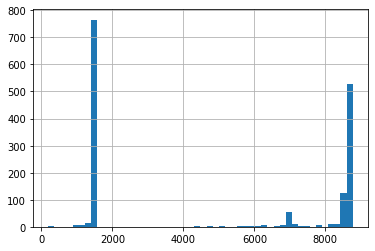

In [4]:
#groups1 = groups1[groups1<2000]
#groups1 = groups1[groups1 > 1400]

print(len(groups1))

groups1.hist(bins = 50)


In [8]:
less_data = groups1[groups1<2000]
less_data = less_data[less_data>1450]

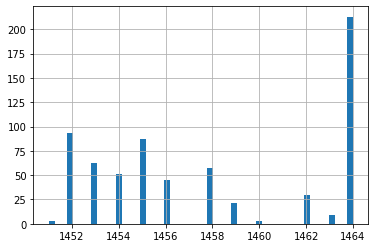

In [9]:
less_data.hist(bins = 50)

In [12]:
ld = df[df["ProfileID"].isin(less_data.index)]

In [16]:
ld.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid,date
1138464,BTW001,12019685,2012-11-01 00:00:00,5.783333,1.0,2012-11-01
1138465,BTW001,12019685,2012-11-01 01:00:00,2.566667,1.0,2012-11-01
1138466,BTW001,12019685,2012-11-01 02:00:00,1.200000,1.0,2012-11-01
1138467,BTW001,12019685,2012-11-01 03:00:00,1.450000,1.0,2012-11-01
1138468,BTW001,12019685,2012-11-01 04:00:00,1.200000,1.0,2012-11-01


In [26]:
ld.ProfileID.unique()

array([12019685, 12019689, 12019693, 12019698, 12019702, 12019706,
       12019711, 12019715, 12019719, 12019724, 12019728, 12019732,
       12019737, 12019741, 12019745, 12019750, 12019754, 12019758,
       12019763, 12019767, 12019771, 12019776, 12019780, 12019784,
       12019789, 12019793, 12019797, 12019802, 12019806, 12019810,
       12019815, 12019819, 12019823, 12019828, 12019832, 12019836,
       12019841, 12019845, 12019849, 12019854, 12019858, 12019862,
       12019867, 12019871, 12019875, 12019880, 12019884, 12019888,
       12019893, 12019897, 12019901, 12019906, 12019910, 12019914,
       12019919, 12019923, 12019927, 12019932, 12019936, 12019940,
       12019945, 12019949, 12019953, 12019958, 12019962, 12019966,
       12019971, 12019975, 12019979, 12019984, 12019988, 12019992,
       12019997, 12020001, 12020005, 12020010, 12020014, 12020018,
       12020023, 12020027, 12020031, 12020036, 12020040, 12020044,
       12020049, 12020053, 12020057, 12020062, 12020066, 12020

In [15]:
ld["date"] = pd.to_datetime(df["Datefield"]).dt.date

C:\Users\Kirsch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
ld["Month"] = pd.to_datetime(df["Datefield"]).dt.month

C:\Users\Kirsch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
ld1 = ld[ld["ProfileID"] == 12020725]

In [39]:
ld1.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid,date,Month
1309065,HKY020,12020725,2012-11-01 00:00:00,0.0,1.0,2012-11-01,11
1309066,HKY020,12020725,2012-11-01 01:00:00,0.0,1.0,2012-11-01,11
1309067,HKY020,12020725,2012-11-01 02:00:00,0.0,1.0,2012-11-01,11
1309068,HKY020,12020725,2012-11-01 03:00:00,0.0,1.0,2012-11-01,11
1309069,HKY020,12020725,2012-11-01 04:00:00,0.0,1.0,2012-11-01,11


In [40]:
day = ld1.groupby("date")['Unitsread'].apply(lambda x: len(x))


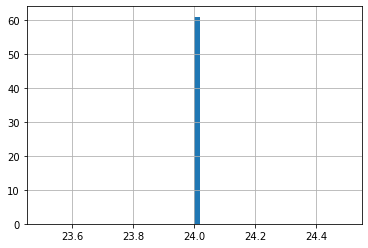

In [41]:
day.hist(bins = 50)

All days for this household have 24 entries - full days are missing not hours in a day

In [42]:
ld1.head()


,RecorderID,ProfileID,Datefield,Unitsread,Valid,date,Month
1309065,HKY020,12020725,2012-11-01 00:00:00,0.0,1.0,2012-11-01,11
1309066,HKY020,12020725,2012-11-01 01:00:00,0.0,1.0,2012-11-01,11
1309067,HKY020,12020725,2012-11-01 02:00:00,0.0,1.0,2012-11-01,11
1309068,HKY020,12020725,2012-11-01 03:00:00,0.0,1.0,2012-11-01,11
1309069,HKY020,12020725,2012-11-01 04:00:00,0.0,1.0,2012-11-01,11


In [43]:
month = ld1.groupby("Month")['Unitsread'].apply(lambda x: len(x))
month.head()

Month
11    720
12    744
Name: Unitsread, dtype: int64